# TITANIC SURVIVAL PREDICTION

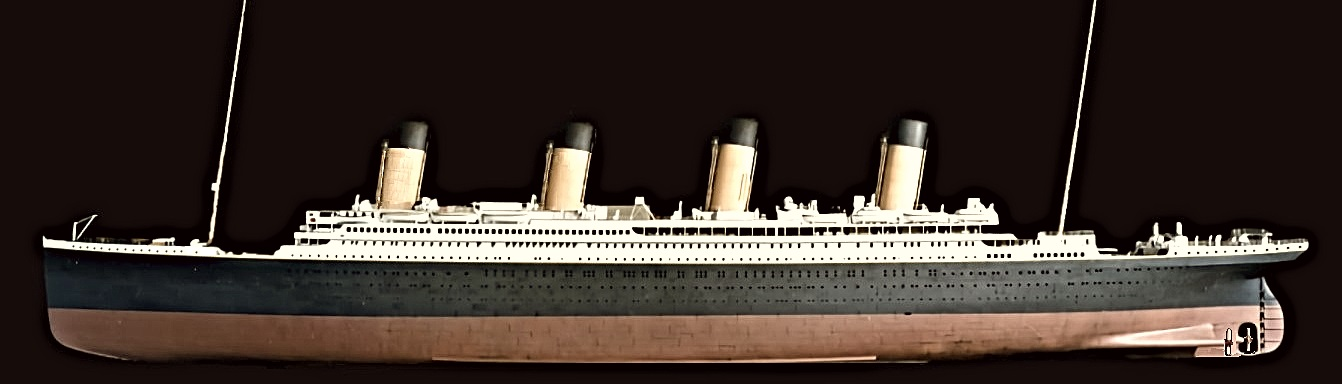

## Data Collection

* Collect the dataset. For demonstration, we'll use the famous Titanic dataset.

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sanja\Downloads\Titanic-Dataset.csv")

In [3]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Drop unwanted columns

In [5]:
df.drop(columns="PassengerId",inplace=True)

## Data Cleaning

### Null values

In [6]:
import missingno

<Axes: >

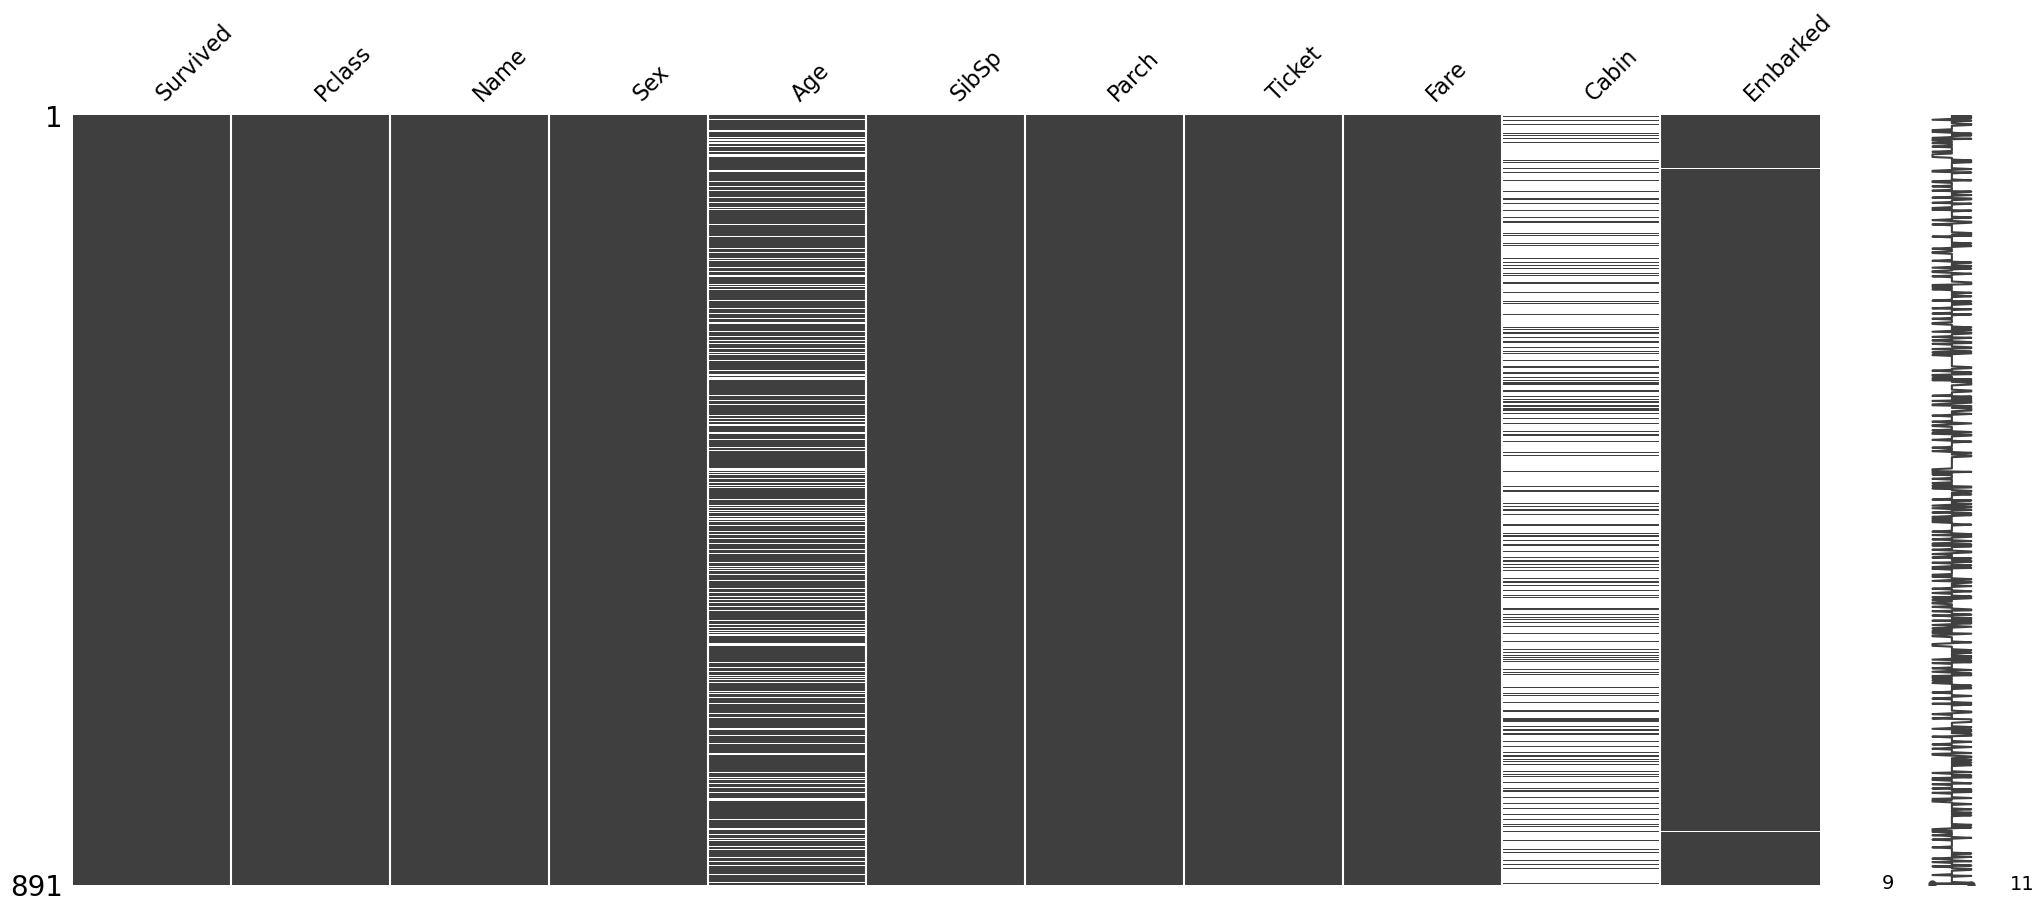

In [7]:
missingno.matrix(df)

* Age , Cabin has null values

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Treatment

In [9]:
df['Age'].median()

28.0

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [11]:
df['Cabin'].mode()[0]

'B96 B98'

In [12]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [13]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [14]:
df['Embarked'].mode()[0]

'S'

In [15]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Duplicates

In [17]:
df.duplicated().sum()

0

* There is no duplicates in this dataset

## Noisy data

In [18]:
for i in df.columns:
    print(df[i].unique())

[0 1]
[3 1 2]
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Ne

## Outliers

In [19]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

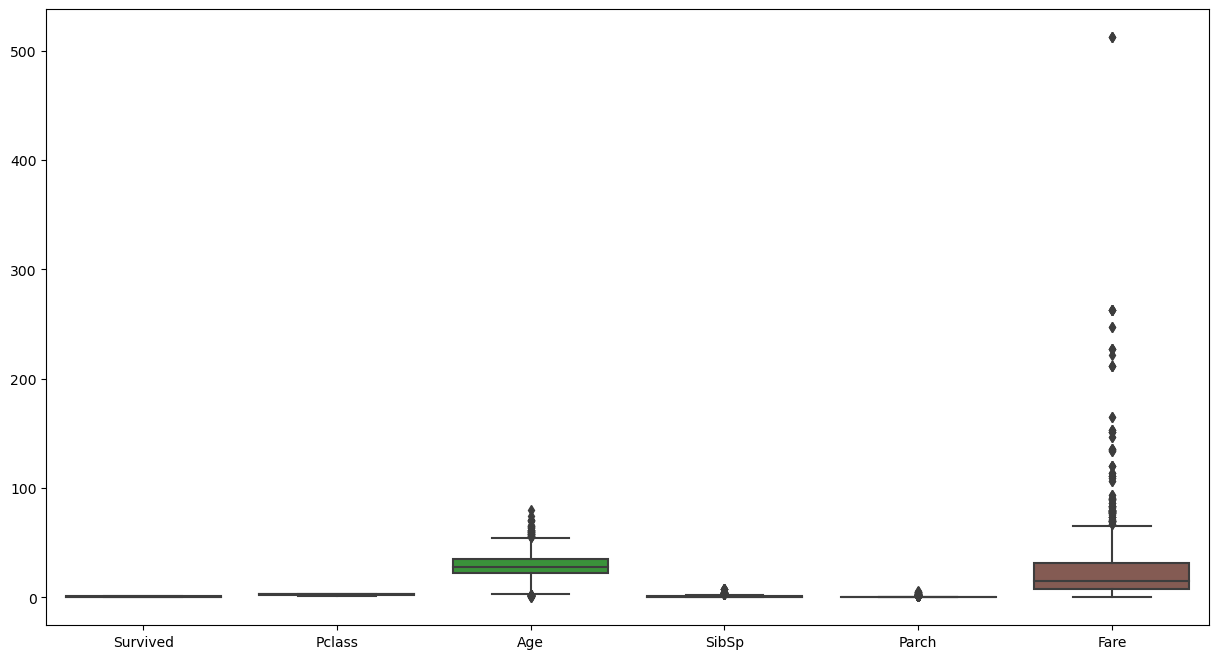

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df)

* Age and Fare columns has a outliers.

## Statistical Analysis

In [21]:
df.describe().T

count       mean        std   min      25%      50%   75%       max
Survived  891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0    1.0000
Pclass    891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000
Age       891.0  29.361582  13.019697  0.42  22.0000  28.0000  35.0   80.0000
SibSp     891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000
Parch     891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000
Fare      891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292

## Target variable

In [22]:
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare    Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500  B96 B98        S  
1  female  38.0      1      0          PC 17599  71.2833      C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250  B96 B98        S  
3  female  35.0      1      0            113803  53.1000     C123        S  
4    male  35.0      0      0            373450   8.0500  B96 B98        S

In [23]:
df['Survived'] = df['Survived'].replace([0,1],["Survived","Not survived"])

## Data Visualization

In [24]:
df.head()

Survived  Pclass                                               Name  \
0      Survived       3                            Braund, Mr. Owen Harris   
1  Not survived       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2  Not survived       3                             Heikkinen, Miss. Laina   
3  Not survived       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4      Survived       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare    Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500  B96 B98        S  
1  female  38.0      1      0          PC 17599  71.2833      C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250  B96 B98        S  
3  female  35.0      1      0            113803  53.1000     C123        S  
4    male  35.0      0      0            373450   8.0500  B96 B98        S

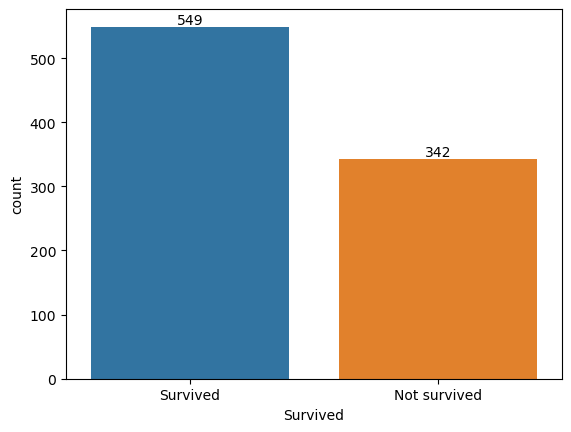

In [25]:
ax = sns.countplot(data = df, x = "Survived")
for i in range(0,1):
    ax.bar_label(ax.containers[i])

**549 passengers did not survive.**

**342 passengers survived.**

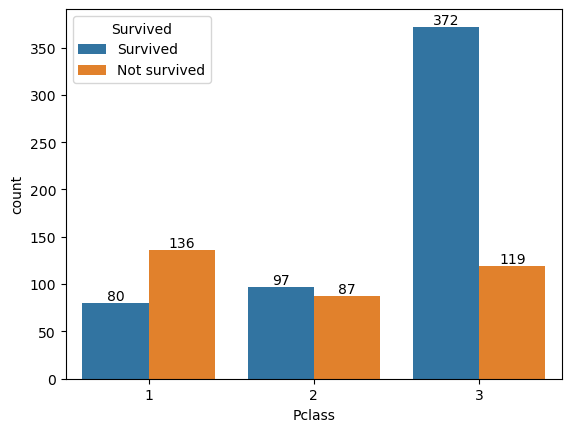

In [26]:
ax = sns.countplot(data = df ,x = "Pclass",hue="Survived")
for i in range(0,2):
    ax.bar_label(ax.containers[i])

**1st Class Survival** : 1st class had more survivors (136) than non-survivors (80).

**3rd Class Fatalities** : 3rd class had more non-survivors (372) than survivors (119).


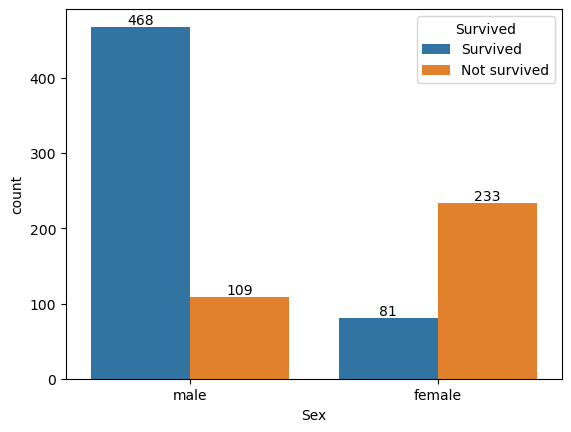

In [27]:
ax = sns.countplot(data = df,x = "Sex",hue="Survived")
for i in range(0,2):
    ax.bar_label(ax.containers[i])

**Two types of Genders::  male, female**
        
*  ......>       male survived = 468
*  ......>       male not survived  = 109
*  ......>       female survived  = 81
*  ......>      female not survivied = 233
    
* As per the graph males are most survival persons when compared to females.

In [28]:
import plotly.express as px

In [29]:
px.histogram(data_frame=df,x = "Age",color="Survived")

* Passengers around age 30 had the highest survival rate.
* Younger passengers (0-20) had more survivors than non-survivors.
* Older passengers (50+) had more non-survivors than survivors.



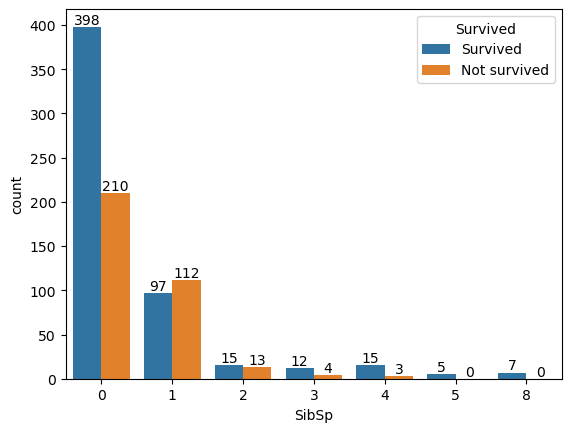

In [30]:
ax = sns.countplot(data=df,x = "SibSp",hue = "Survived")
for i in range(0,2):
    ax.bar_label(ax.containers[i])

* Survival with No Siblings/Spouses (SibSp=0): Passengers with no siblings or spouses onboard had a higher count of non-survivors (398) compared to survivors (210).

* Survival with One Sibling/Spouse (SibSp=1): Passengers with one sibling or spouse had a relatively balanced count, with slightly more non-survivors (112) than survivors (97).

* Low Survival Rate with Multiple Siblings/Spouses (SibSp=2-8): Passengers with two or more siblings or spouses generally had fewer survivors than non-survivors, with the survival count being particularly low for higher SibSp values.

In [31]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

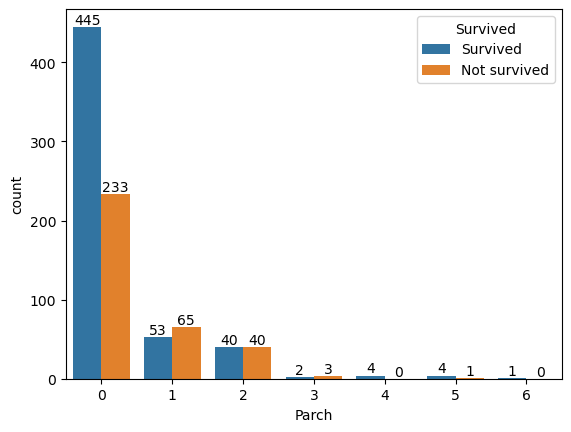

In [32]:
ax = sns.countplot(data=df,x = "Parch",hue = "Survived")
for i in range(0,2):
    ax.bar_label(ax.containers[i])

* Survival with No Parents/Children (Parch=0): Passengers without parents or children onboard had a significantly higher number of non-survivors (445) compared to survivors (233).

* Survival with One Parent/Child (Parch=1): Passengers with one parent or child had more survivors (65) than non-survivors (53).








In [33]:
px.histogram(data_frame=df,x = "Fare",color="Survived")

* The majority of passengers paid fares under $100.This is evident from the fact that the tallest bars in the histogram are clustered in the 0-100 fare range.

* There is a positive correlation between fare price and survival rate. This can be seen in the general trend of the blue bars (survived) increasing in height as the fare price increases.

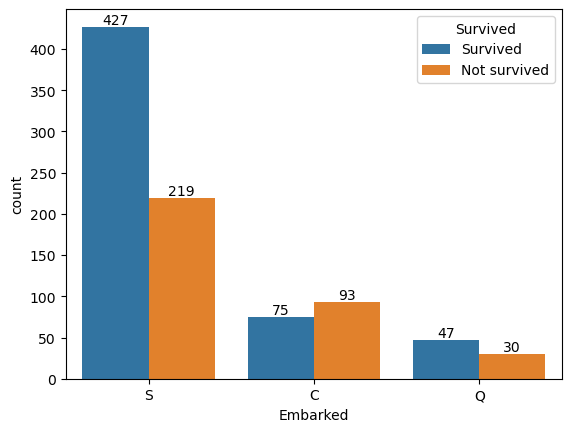

In [34]:
ax = sns.countplot(data=df ,  x = "Embarked",hue="Survived")
for i in range(0,2):
    ax.bar_label(ax.containers[i])

In [35]:
df[df['Survived'] == 1]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [36]:
s = df['Embarked'].value_counts()

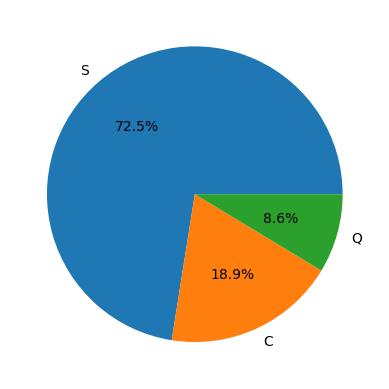

In [37]:
plt.pie(s,labels=s.index,autopct="%2.1f%%")
plt.show()

* `s` is the highest count followed by `c` and `Q`

In [38]:
df.corr(numeric_only=True)

Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age    -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp   0.083081 -0.233296  1.000000  0.414838  0.159651
Parch   0.018443 -0.172482  0.414838  1.000000  0.216225
Fare   -0.549500  0.096688  0.159651  0.216225  1.000000

<Axes: >

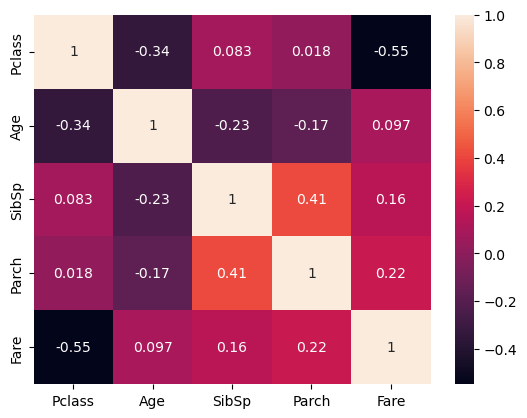

In [39]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

C:\Users\sanja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



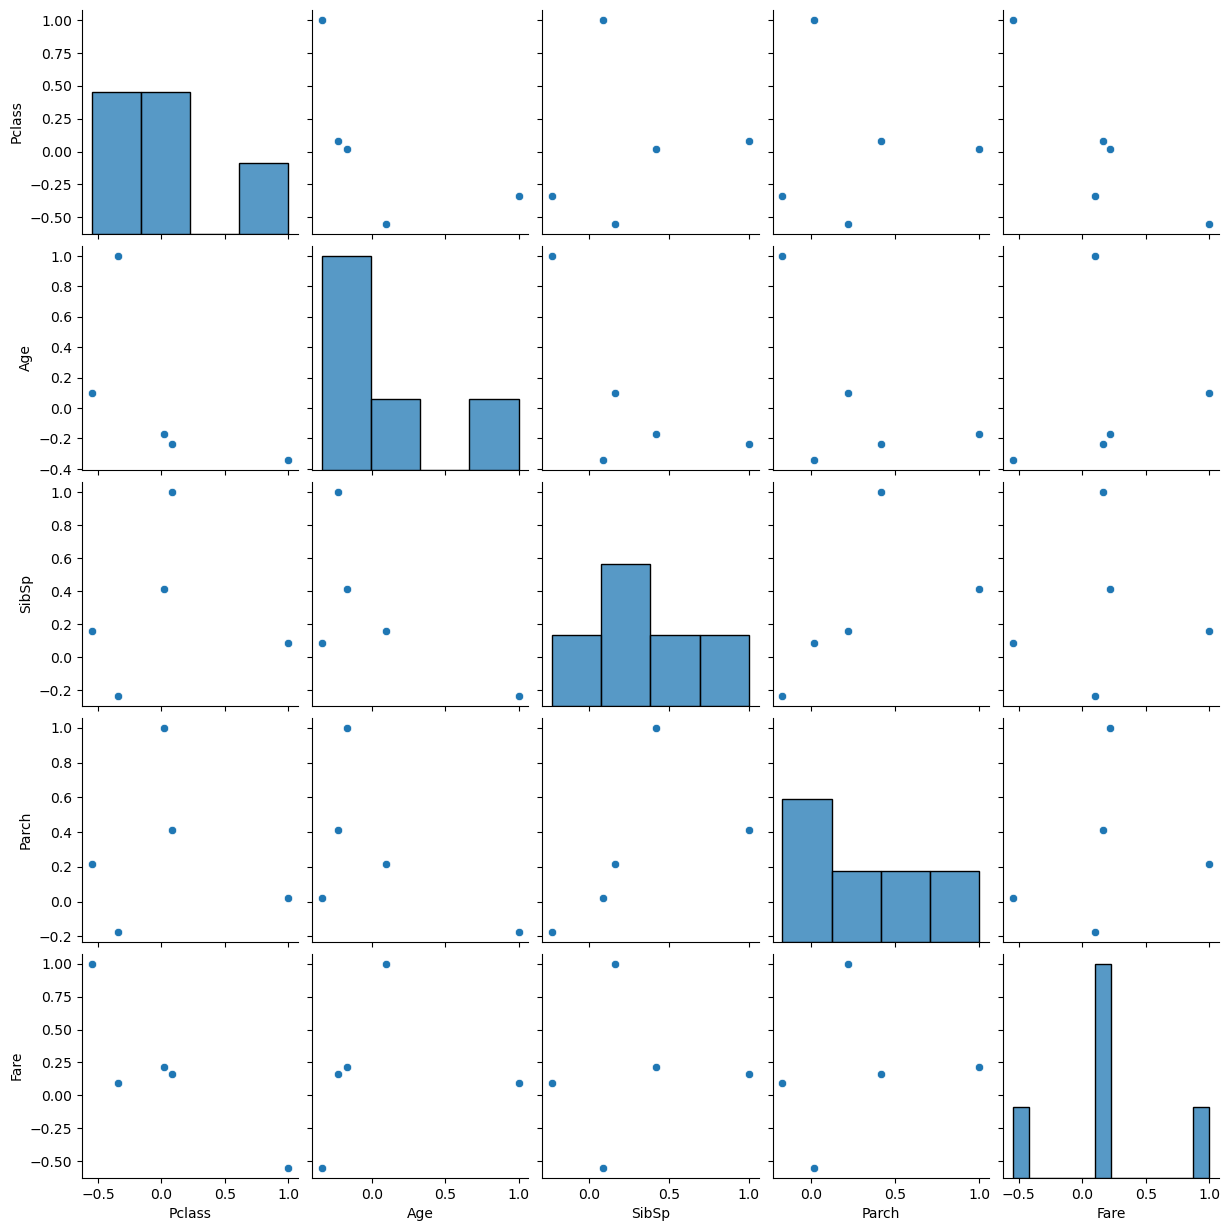

In [40]:
sns.pairplot(df.corr(numeric_only=True))

## Seggregate Input and Outputs

In [41]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [42]:
X.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

## Split the into train and test

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [45]:
print(X_train.shape,y_train.shape)

(712, 7) (712,)


In [46]:
print(X_test.shape,y_test.shape)

(179, 7) (179,)


In [47]:
X_train_cat = X_train.drop(columns=['Age','Fare'])

In [48]:
X_train_num = X_train[['Age',"Fare"]]

In [49]:
X_test_cat = X_test.drop(columns=['Age','Fare'])

In [50]:
X_test_num = X_test[['Age',"Fare"]]

## Data Preparation

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),columns=scaler.get_feature_names_out(),index = X_train_num.index)

In [54]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num),columns=scaler.get_feature_names_out(),index = X_test_num.index)

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
encode = OneHotEncoder(sparse_output=False)

In [57]:
X_train_cat_transformed = pd.DataFrame(encode.fit_transform(X_train_cat),columns=encode.get_feature_names_out(),index = X_train_cat.index)

In [58]:
X_test_cat_transformed = pd.DataFrame(encode.transform(X_test_cat),columns=encode.get_feature_names_out(),index = X_test_cat.index)

## Concatenation

In [59]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed],axis=1)

In [60]:
X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_transformed],axis=1)

## Model Building

## A. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
reg = LogisticRegression()

In [63]:
%%time
reg.fit(X_train_transformed,y_train)

CPU times: total: 15.6 ms
Wall time: 79.9 ms


LogisticRegression()

### Train Pred

In [64]:
y_train_pred = reg.predict(X_train_transformed)

### Test pred 

In [65]:
y_test_pred = reg.predict(X_test_transformed)

In [66]:
res_train = pd.DataFrame({"y_train_autual":y_train,"y_train_pred":y_train_pred})

In [67]:
res_train

y_train_autual  y_train_pred
331       Survived      Survived
733       Survived      Survived
382       Survived      Survived
704       Survived      Survived
813       Survived      Survived
..             ...           ...
106   Not survived  Not survived
270       Survived      Survived
860       Survived      Survived
435   Not survived  Not survived
102       Survived  Not survived

[712 rows x 2 columns]

In [68]:
res_test = pd.DataFrame({"test_autual":y_test,"test_pred":y_test_pred})

In [69]:
res_test

test_autual     test_pred
709  Not survived      Survived
439      Survived      Survived
840      Survived      Survived
720  Not survived  Not survived
39   Not survived  Not survived
..            ...           ...
433      Survived      Survived
773      Survived      Survived
25   Not survived      Survived
84   Not survived  Not survived
10   Not survived  Not survived

[179 rows x 2 columns]

## Train and Test score

In [70]:
from sklearn import metrics

In [71]:
%%time

print(f"Train accuracy score {metrics.accuracy_score(y_train_pred,y_train)}")
print()
print(f"Test accuracy score {metrics.accuracy_score(y_test_pred,y_test)}")
print()

Train accuracy score 0.8103932584269663

Test accuracy score 0.7932960893854749

CPU times: total: 0 ns
Wall time: 1.66 ms


In [72]:
log_train_score = metrics.accuracy_score(y_train_pred,y_train)

In [73]:
log_test_score = metrics.accuracy_score(y_test_pred,y_test)

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

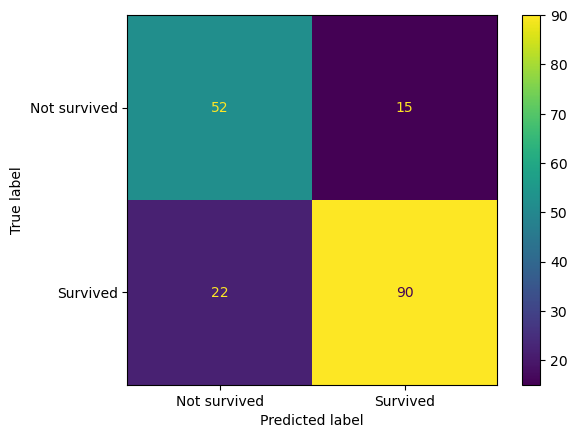

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test_pred,y_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

Not survived       0.70      0.78      0.74        67
    Survived       0.86      0.80      0.83       112

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179



## B. KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()

In [80]:
%%time
knn.fit(X_train_transformed,y_train)

CPU times: total: 0 ns
Wall time: 4.55 ms


KNeighborsClassifier()

## Train and Test score

In [83]:
%%time

print(f"Train accuracy score {metrics.accuracy_score(y_train_pred,y_train)}")
print()
print(f"Test accuracy score {metrics.accuracy_score(y_test_pred,y_test)}")
print()

Train accuracy score 0.8103932584269663

Test accuracy score 0.7932960893854749

CPU times: total: 0 ns
Wall time: 4.72 ms


In [84]:
knn_train_score = metrics.accuracy_score(y_train_pred,y_train)

In [85]:
knn_test_score = metrics.accuracy_score(y_test_pred,y_test)

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay

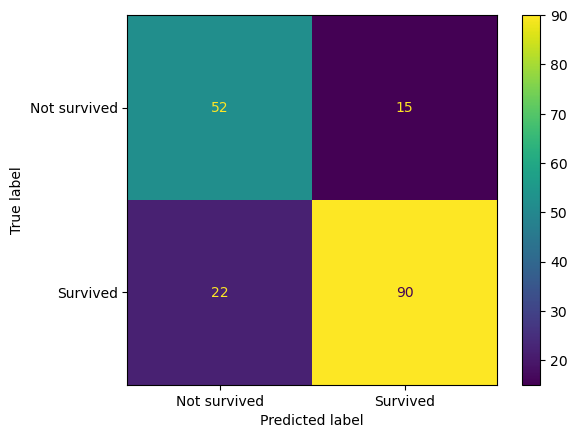

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test_pred,y_test)

In [95]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

Not survived       0.70      0.78      0.74        67
    Survived       0.86      0.80      0.83       112

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179



## C. Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
tree = DecisionTreeClassifier(max_depth=4)

In [92]:
%%time
tree.fit(X_train_transformed,y_train)

CPU times: total: 15.6 ms
Wall time: 10 ms


DecisionTreeClassifier(max_depth=4)

## Train Pred

In [93]:
y_train_pred = tree.predict(X_train_transformed)

## Test pred

In [96]:
y_test_pred = tree.predict(X_test_transformed)

## Train and Test score

In [97]:
%%time

print(f"Train accuracy score {metrics.accuracy_score(y_train_pred,y_train)}")
print()
print(f"Test accuracy score {metrics.accuracy_score(y_test_pred,y_test)}")
print()

Train accuracy score 0.8384831460674157

Test accuracy score 0.7988826815642458

CPU times: total: 0 ns
Wall time: 4.42 ms


In [98]:
dt_train_score = metrics.accuracy_score(y_train_pred,y_train)

In [99]:
dt_test_score = metrics.accuracy_score(y_test_pred,y_test)

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay

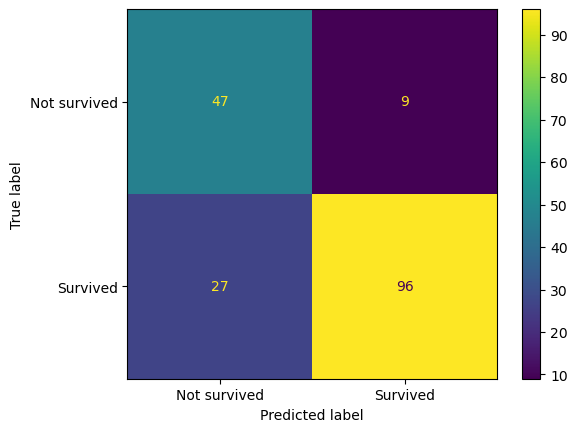

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test_pred,y_test)

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

Not survived       0.64      0.84      0.72        56
    Survived       0.91      0.78      0.84       123

    accuracy                           0.80       179
   macro avg       0.77      0.81      0.78       179
weighted avg       0.83      0.80      0.80       179



## D. Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
classifier = RandomForestClassifier()

In [106]:
%%time
classifier.fit(X_train_transformed,y_train)

CPU times: total: 203 ms
Wall time: 301 ms


RandomForestClassifier()

## Train Pred`

In [107]:
y_train_pred = classifier.predict(X_train_transformed)

## Test pred

In [108]:
y_test_pred = classifier.predict(X_test_transformed)

## Train and Test score

In [109]:
%%time

print(f"Train accuracy score {metrics.accuracy_score(y_train_pred,y_train)}")
print()
print(f"Test accuracy score {metrics.accuracy_score(y_test_pred,y_test)}")
print()

Train accuracy score 0.9789325842696629

Test accuracy score 0.8156424581005587

CPU times: total: 0 ns
Wall time: 8.69 ms


In [110]:
random_train_score = metrics.accuracy_score(y_train_pred,y_train)

In [111]:
random_test_score= metrics.accuracy_score(y_test_pred,y_test)

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

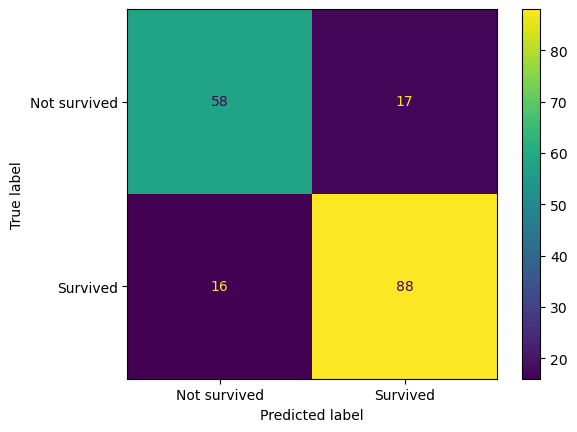

In [113]:
ConfusionMatrixDisplay.from_predictions(y_test_pred,y_test)

In [114]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

Not survived       0.78      0.77      0.78        75
    Survived       0.84      0.85      0.84       104

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## E. SVM

In [115]:
from sklearn.svm import SVC

In [116]:
svm = SVC()

In [117]:
%%time
svm.fit(X_train_transformed,y_train)

CPU times: total: 31.2 ms
Wall time: 31.9 ms


SVC()

## Train Pred

In [118]:
y_train_pred = svm.predict(X_train_transformed)

## Test pred

In [119]:
y_test_pred = svm.predict(X_test_transformed)

## Train and Test score

In [120]:
%%time

print(f"Train accuracy score {metrics.accuracy_score(y_train_pred,y_train)}")
print()
print(f"Test accuracy score {metrics.accuracy_score(y_test_pred,y_test)}")
print()

Train accuracy score 0.8412921348314607

Test accuracy score 0.8100558659217877

CPU times: total: 0 ns
Wall time: 4.23 ms


In [121]:
svm_train_score = metrics.accuracy_score(y_train_pred,y_train)

In [122]:
svm_test_score = metrics.accuracy_score(y_test_pred,y_test)

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay

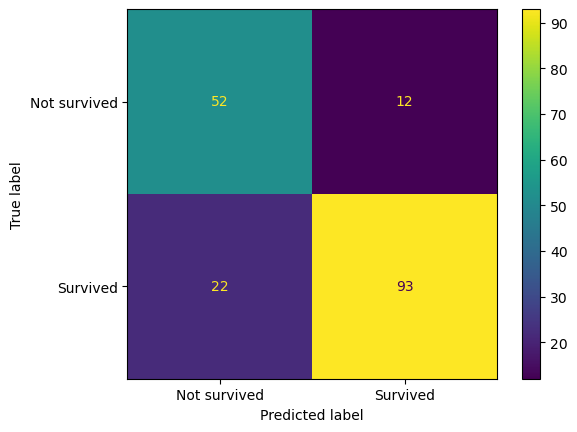

In [124]:
ConfusionMatrixDisplay.from_predictions(y_test_pred,y_test)

In [125]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

Not survived       0.70      0.81      0.75        64
    Survived       0.89      0.81      0.85       115

    accuracy                           0.81       179
   macro avg       0.79      0.81      0.80       179
weighted avg       0.82      0.81      0.81       179



## Impotant Features

In [126]:
classifier.feature_importances_

array([0.24349425, 0.23700356, 0.02708133, 0.01685435, 0.05366236,
       0.12392297, 0.16557486, 0.01541571, 0.01553434, 0.00557826,
       0.00655716, 0.00466664, 0.00146707, 0.00198926, 0.01568645,
       0.01215393, 0.00969867, 0.0011565 , 0.00210339, 0.00128615,
       0.00096496, 0.01588162, 0.00780592, 0.01446029])

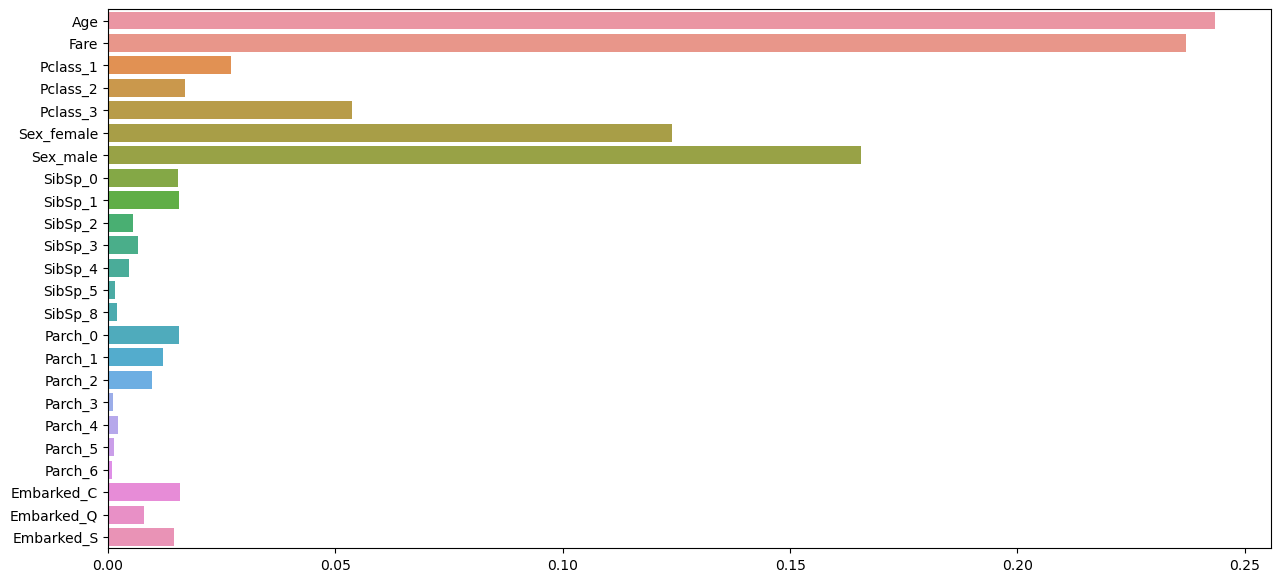

In [127]:
plt.figure(figsize=(15,7))

sns.barplot(x=classifier.feature_importances_, y = X_train_transformed.columns)

plt.show()

* Age , fare and gender are the best features in this dataset

## Analyzing Train score

In [128]:
Alg = ["Logestic alg","KNN","DT","Random forest","SVM"]

In [129]:
Train_scores = [log_train_score,knn_train_score,dt_train_score,random_train_score,svm_train_score]

<Axes: >

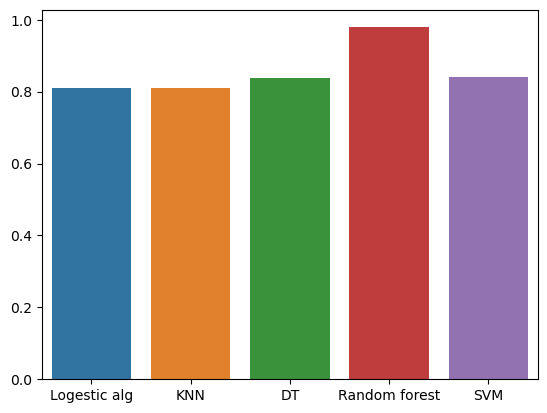

In [130]:
sns.barplot(x = Alg,y = Train_scores,palette="tab10")

## Analyzing Test score

In [131]:
Test_scores = [log_test_score,knn_test_score,dt_test_score,random_test_score,svm_test_score]

<Axes: >

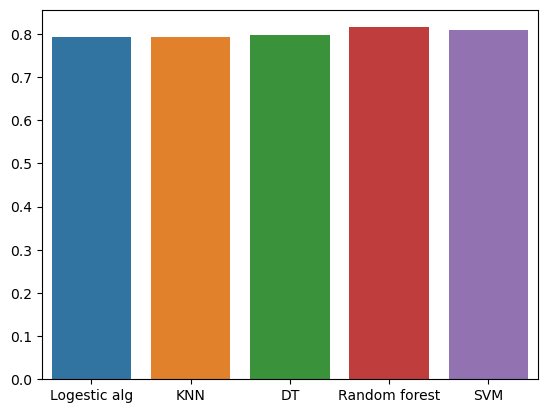

In [132]:
sns.barplot(x = Alg,y = Test_scores,palette="tab10")

* By Analyzing these two plots **Random Forest** is looks like best algorithm.Train score and Test score much better when compared to other alogorithms.

## Prediction

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
ran_class = RandomForestClassifier()

In [135]:
ran_class.fit(X_train_num_transformed,y_train)

RandomForestClassifier()

In [136]:
y_train_pred = ran_class.predict(X_train_num_transformed)

In [137]:
y_test_pred = ran_class.predict(X_test_num_transformed)

In [138]:
%%time

print(f"Train accuracy score {metrics.accuracy_score(y_train_pred,y_train)}")
print()
print(f"Test accuracy score {metrics.accuracy_score(y_test_pred,y_test)}")
print()

Train accuracy score 0.952247191011236

Test accuracy score 0.6815642458100558

CPU times: total: 0 ns
Wall time: 3.81 ms


In [139]:
from pickle import load

In [140]:
from pickle import dump

In [151]:
dump(scaler,open("pickle/scaler.pkl","wb"))
dump(ran_class,open("pickle/classifier.pkl","wb"))
dump(encode,open("pickle/encode.pkl","wb"))

In [152]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()

In [145]:
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),columns=scaler.get_feature_names_out(),index = X_train_num.index)

In [146]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num),columns=scaler.get_feature_names_out(),index = X_test_num.index)

In [153]:
path = r"C:\Users\sanja\TDS AVENUE CODEFORGE-intern\pickle\scaler.pkl"

In [154]:
cl_path = r"C:\Users\sanja\TDS AVENUE CODEFORGE-intern\pickle\classifier.pkl"

In [155]:
en_path = r"C:\Users\sanja\TDS AVENUE CODEFORGE-intern\pickle\encode.pkl"

In [156]:
scaler = load(open(path,"rb"))
classifier_1 = load(open(cl_path,"rb"))
encode = load(open(en_path,"rb"))

In [157]:
Age = int(input("Enter a age:: "))
Fare  = int(int(input("enter a fare value:: ")))

input_fea = [Age,Fare]

def prediction(input_fea):
    
    a1 = scaler.transform([input_fea])
    
    prediction = classifier_1.predict(a1)
    
    return prediction

survive = prediction(input_fea)

print(survive)

Enter a age:: 23
enter a fare value:: 3
['Survived']


C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

